In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/healthcare-dataset-stroke-data (1).csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


I ran this cell to in order to confirm whether the data cell had any null values and check the data types

In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df.loc[df['gender'] == 'Male' 'gender'] = 'M'
df.loc[df['gender'] == 'Female' 'gender'] = 'F'



I ran the first code to check whether the first code needed any cleaning

In [ ]:
male_df= df[df["gender"]== "male"]
female_df= df[df["gender"]== "female"]
other_df= df[df["gender"]== "other"]

I filtered the male and female into different datasets

In [ ]:
df["gender"].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


I had 5100 people in the dataset. 2994 females, 2115 males

In [ ]:
df["gender"].value_counts(normalize=True)*100

,proportion
gender,
Female,58.590998
Male,41.389432
Other,0.019569


I got the percentages of the genders

In [ ]:
df.groupby("gender")["age"].value_counts()

gender  age  
Female  45.00    61
        78.00    60
        79.00    59
        50.00    55
        51.00    54
                 ..
Male    0.48      1
        1.24      1
        1.40      1
        1.48      1
Other   26.00     1
Name: count, Length: 206, dtype: int64

The age in males is in decimals because it is a baby and the term is written in float. Males have more prediction analysis as opposed to females

In [ ]:
df.groupby("gender")["hypertension"].value_counts(normalize=True)*100

gender  hypertension
Female  0                90.781563
        1                 9.218437
Male    0                89.503546
        1                10.496454
Other   0               100.000000
Name: proportion, dtype: float64

A higher percentage of females have less hypertension as compared to males


In [ ]:
df.groupby("gender")["heart_disease"].value_counts(normalize=True)*100 #

gender  heart_disease
Female  0                 96.225785
        1                  3.774215
Male    0                 92.293144
        1                  7.706856
Other   0                100.000000
Name: proportion, dtype: float64

In [ ]:
df.groupby("gender")["ever_married"].value_counts(normalize=True)*100 #

gender  ever_married
Female  Yes              66.833667
        No               33.166333
Male    Yes              63.924350
        No               36.075650
Other   No              100.000000
Name: proportion, dtype: float64

In [ ]:
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


In [ ]:
df.groupby("avg_glucose_level")["Residence_type"].value_counts()

,,count
avg_glucose_level,Residence_type,
55.12,Rural,1
55.22,Urban,1
55.23,Rural,1
55.25,Urban,1
55.26,Rural,1
...,...,...
266.59,Rural,1
267.60,Rural,1
267.61,Urban,1


In [ ]:
df.groupby("bmi")["Residence_type"].value_counts(normalize=True)*100

,,proportion
bmi,Residence_type,
10.3,Rural,100.0
11.3,Urban,100.0
11.5,Rural,100.0
12.0,Urban,100.0
12.3,Urban,100.0
...,...,...
66.8,Rural,100.0
71.9,Rural,100.0
78.0,Urban,100.0


In [ ]:
df.groupby("smoking_status")["Residence_type"].value_counts(normalize=True)*100

smoking_status   Residence_type
Unknown          Urban             50.647668
                 Rural             49.352332
formerly smoked  Urban             51.638418
                 Rural             48.361582
never smoked     Rural             50.792812
                 Urban             49.207188
smokes           Urban             53.992395
                 Rural             46.007605
Name: proportion, dtype: float64

In [ ]:
df['avg_glucose_level'].value_counts()

,count
avg_glucose_level,
93.88,6
73.00,5
72.49,5
91.85,5
91.68,5
...,...
61.98,1
91.01,1
120.03,1


In [ ]:
df.groupby("avg_glucose_level")["smoking_status"].value_counts(normalize=True)*100

,,proportion
avg_glucose_level,smoking_status,
55.12,never smoked,100.0
55.22,never smoked,100.0
55.23,Unknown,100.0
55.25,never smoked,100.0
55.26,Unknown,100.0
...,...,...
266.59,never smoked,100.0
267.60,never smoked,100.0
267.61,smokes,100.0


In [ ]:
df.groupby("avg_glucose_level")["bmi"].value_counts(normalize=True)*100

,,proportion
avg_glucose_level,bmi,
55.12,21.8,100.0
55.22,27.0,100.0
55.23,28.9,100.0
55.25,20.4,100.0
55.26,33.2,100.0
...,...,...
266.59,25.5,100.0
267.60,30.5,100.0
267.61,27.9,100.0


In [ ]:
df.groupby("bmi").value_counts()

,,,,,,,,,,,,count
bmi,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,
10.3,38043,Female,1.24,0,0,No,children,Rural,122.04,Unknown,0,1
11.3,3205,Female,79.00,0,0,Yes,Self-employed,Urban,79.03,Unknown,0,1
11.5,59993,Male,40.00,0,0,Yes,Private,Rural,60.96,never smoked,0,1
12.0,20364,Female,4.00,0,0,No,children,Urban,107.25,Unknown,0,1
12.3,45893,Female,8.00,0,0,No,children,Urban,106.51,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66.8,37759,Female,53.00,0,0,Yes,Private,Rural,72.63,Unknown,0,1
71.9,545,Male,42.00,0,0,Yes,Private,Rural,210.48,never smoked,0,1
78.0,41097,Female,23.00,1,0,No,Private,Urban,70.03,smokes,0,1


In [ ]:
df.groupby("bmi")["smoking_status"].value_counts(normalize=True)*100

,,proportion
bmi,smoking_status,
10.3,Unknown,100.0
11.3,Unknown,100.0
11.5,never smoked,100.0
12.0,Unknown,100.0
12.3,Unknown,100.0
...,...,...
66.8,Unknown,100.0
71.9,never smoked,100.0
78.0,smokes,100.0


In [ ]:
ratings_mean_count = pd.DataFrame(df.groupby('gender')['stroke'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('gender')['stroke'].count())
ratings_mean_count

,stroke,rating_counts
gender,,
Female,0.047094,2994
Male,0.051064,2115
Other,0.000000,1


from matplotlib import pyplot as plt
ratings_mean_count['stroke'].plot(kind='hist', bins=20, title='stroke')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratings_mean_count['rating_counts'].plot(kind='hist', bins=20, title='rating_counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratings_mean_count.plot(kind='scatter', x='stroke', y='rating_counts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratings_mean_count['stroke'].plot(kind='line', figsize=(8, 4), title='stroke')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ratings_mean_count['rating_counts'].plot(kind='line', figsize=(8, 4), title='rating_counts')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='gender'>

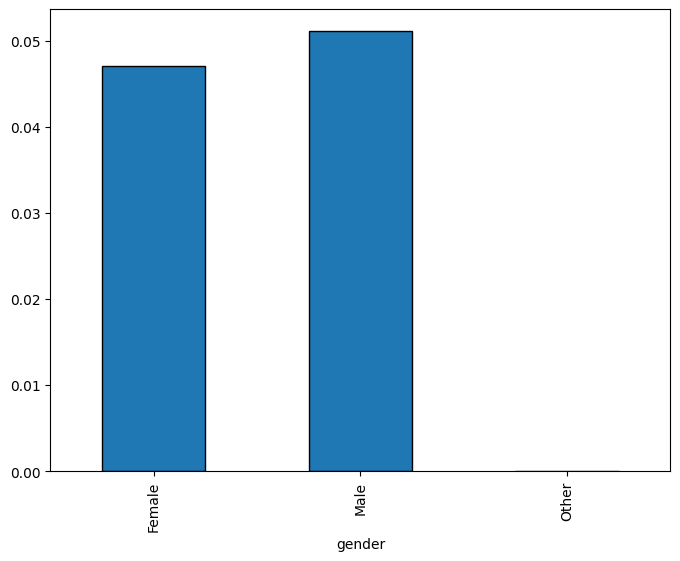

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['stroke'].plot.bar()

AGE DISTRIBUTION GRAPH

In [ ]:
print(df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

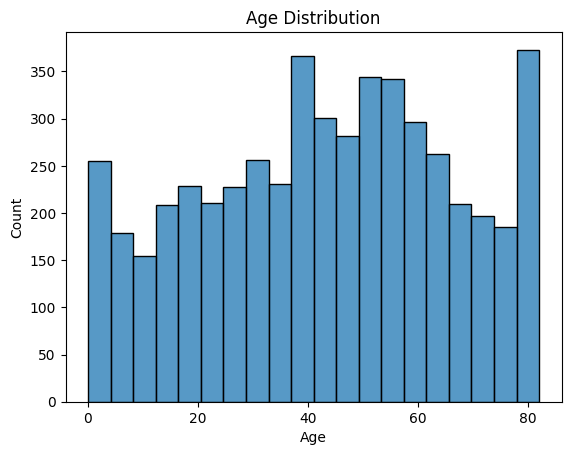

In [ ]:
sns.histplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#BMI GRAPH

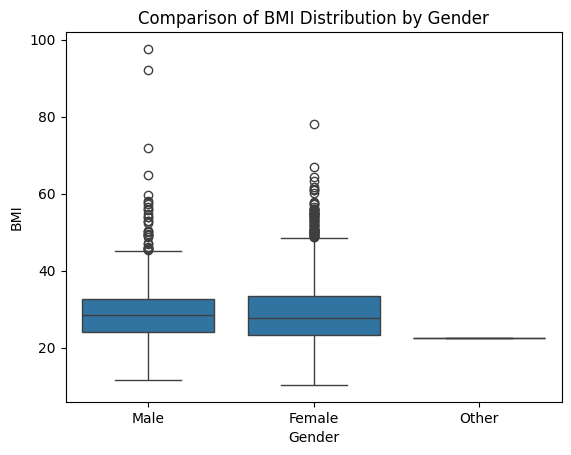

In [ ]:
sns.boxplot(x='gender', y='bmi', data=df)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Comparison of BMI Distribution by Gender')
plt.show()

In [ ]:
kmf = df.groupby('gender')['bmi'].mean()
print(kmf)

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64


CORRELATION MATRIX

In [50]:
for col in df.columns:
  print(col, 'number of unique values is :', df[col].nunique())
  print(df[col].unique())
  print ('\n')

id number of unique values is : 5110
[ 9046 51676 31112 ... 19723 37544 44679]


gender number of unique values is : 3
['Male' 'Female' 'Other']


age number of unique values is : 104
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.4

In [51]:
for col in df.columns:
  print(col, 'number of unique values is :', df[col].nunique())
  print("value counts is :", df[col].value_counts())
  print ('----------------------')


id number of unique values is : 5110
value counts is : id
44679    1
9046     1
51676    1
31112    1
60182    1
        ..
12109    1
60491    1
27419    1
10434    1
53882    1
Name: count, Length: 5110, dtype: int64
----------------------
gender number of unique values is : 3
value counts is : gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
----------------------
age number of unique values is : 104
value counts is : age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64
----------------------
hypertension number of unique values is : 2
value counts is : hypertension
0    4612
1     498
Name: count, dtype: int64
----------------------
heart_disease number of unique values is : 2
value counts is : heart_disease
0    4834
1     276
Name: count, dtype: int64
----------------------
ever_married number of unique values is : 2
val

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='2g', linewidths=4)
plt.title('Correlation Matrix', fontsize=30)


ValueError: could not convert string to float: 'Male'